Import packages and functions

In [1]:
import sys
sys.path.append('../../../')



import numpy as np
import matplotlib.pyplot as plt
from scripts.forecast import compare_fisher_matrices, FisherMatrix
import seaborn as sns
import pandas as pd
from scripts.utils import  set_mpl, path2plots, path2res_forecast
set_mpl()

set palette to pastel
set matplotlib rc
set palette to pastel
set matplotlib rc


Define the photo-z properties and plotting style

In [2]:

sigmas_clu = np.array([0.3, 0.2, 0.1,   0.07, 0.05,
                       0.03, 0.02, 0.015, 0.01, 0.005])
f_fails_clu = np.array([0.01, 0.02, 0.05,  0.1, 0.2])


sigmas_agn = np.array([0.3, 0.2, 0.1,   0.07, 0.05,
                       0.03, 0.02, 0.015])
f_fails_agn = np.array([0.01, 0.02, 0.05,  0.1, 0.2])



corner_plot_args = {'linewidths': [1.5, 1.5, 2], 'shade': True,  'shade_alpha': 0.4, 'sigmas': [1], 'label_font_size': 20, 'tick_font_size': 15, 'colors': sns.color_palette('pastel').as_hex(), 
'linestyles': ['--', '--', '-'], 'legend_kwargs':{'title':r'Tracer ($\sigma_0$; $f_{{\rm fail}}$)', 'fontsize': 15}}

%matplotlib inline
savepath = path2res_forecast + 'cosmo-photoz/'


Load the results of the previous script

In [3]:
def load_fisher_sigma0_f_fail(sigma_0, f_fail,):
    setname_clu = f'Clusters_{sigma_0}_{f_fail}'
    fname_clu = savepath + f'{setname_clu}.npz'
    setname_agn = f'AGN_{sigma_0}_{f_fail}'
    fname_agn = savepath + f'{setname_agn}.npz'
    Fs = []
    for fname, setname in zip([fname_clu, fname_agn], [setname_clu, setname_agn]):
        try:
            arr = np.load(fname, allow_pickle=True)
            pars = arr['pars']
            par_names = arr['par_names']
            F = arr['F']
            J = arr['J']
            comp=setname.split('_')
            Fname = f'{comp[0]}({comp[1]},{comp[2]})'
            F = FisherMatrix(par=pars, par_names=par_names, F=F,
                                J=J, name=Fname, function=lambda x: x)
            F = F.transform_to_Om()
            #F.check_derivatives()
            Fs.append(F)
        except FileNotFoundError:
            #print(f'{fname} not found')
            Fs.append(None)
    return Fs



In [4]:
Fs = []
idx = 0
res = []
for sigma_0 in sigmas_clu:
    for f_fail in f_fails_clu:
        Fs_tmp = load_fisher_sigma0_f_fail(sigma_0, f_fail)
        res.append({'sigma_0': sigma_0, 'f_fail': f_fail, 'F_agn': Fs_tmp[1], 'F_clu': Fs_tmp[0]})
        Fs.append([Fs_tmp[0], Fs_tmp[1]])
        idx += 1
df_cosmo = pd.DataFrame(res)

In [5]:

pessimistic_agn_id = 18
conservative_agn_id =  23
optimistic_agn_id =  28

pessimistic_clu_id = 32
conservative_clu_id = 41
optimistic_clu_id = 45



In [6]:
planck_ns_prior = 0.0042
planck_h_prior =0.0054


In [7]:
# #Planck 2015 table 4
# Obh2 = 0.02230
# dObh2 = 0.00014
# h = 0.6774
# dh = 0.0046
# Ob = Obh2/h**2
# dOb = dObh2/h**2
# print(f'{Ob=}')
# print(f'{dOb=}')

# #wiki: omb = 0.0486±0.0010

# FISHER ELLIPSES FIGURE

$h$ prior
$f_{\rm sky} = 0.658$
Clusters(0.005,0.01) h prior (0.1)
FoM: 4.43e+09
Omega_m: 0.300 +- 0.027 (8.9 %)
Omega_b: 0.050 +- 0.010 (19.1 %)
h: 0.700 +- 0.097 (13.8 %)
n_s: 0.960 +- 0.095 (9.9 %)
sigma_8: 0.800 +- 0.006 (0.8 %)
-------
AGN(0.03,0.1) h prior (0.1)
FoM: 1.56e+10
Omega_m: 0.300 +- 0.023 (7.5 %)
Omega_b: 0.050 +- 0.009 (17.7 %)
h: 0.700 +- 0.091 (12.9 %)
n_s: 0.960 +- 0.072 (7.5 %)
sigma_8: 0.800 +- 0.006 (0.8 %)
-------
Clusters(0.005,0.01) h prior (0.1)+AGN(0.03,0.1) h prior (0.1)
FoM: 6.36e+10
Omega_m: 0.300 +- 0.014 (4.8 %)
Omega_b: 0.050 +- 0.006 (12.5 %)
h: 0.700 +- 0.065 (9.3 %)
n_s: 0.960 +- 0.052 (5.4 %)
sigma_8: 0.800 +- 0.004 (0.5 %)
-------


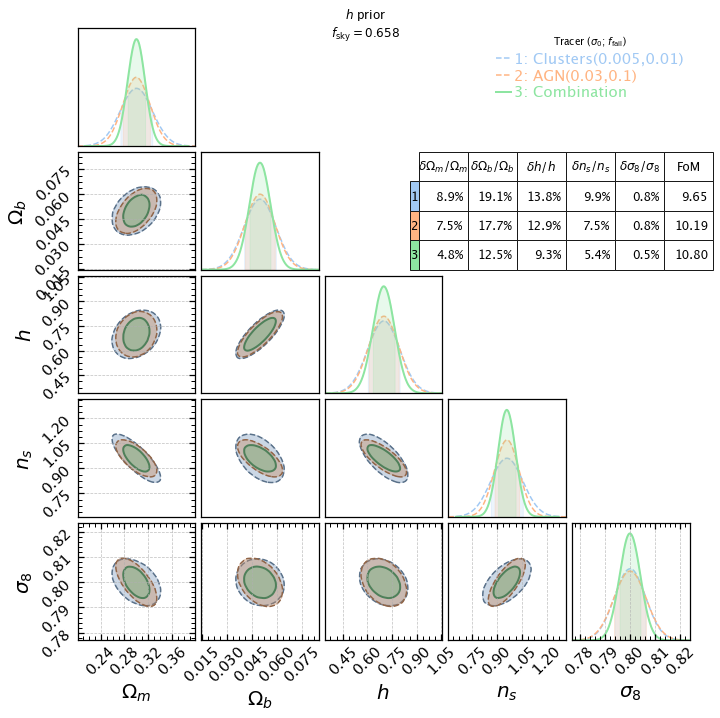

In [8]:

fig, table = compare_fisher_matrices([Fa:=Fs[optimistic_clu_id][0].add_prior_by_idx(2, 0.1), Fb:=Fs[optimistic_agn_id][1].add_prior_by_idx(2, 0.1), Fa+Fb], title = '$h$ prior', filename = f'{path2plots}/cosmo_forecast/fisher_matr_optimistic_prior.png', fsky = 0.658, factor = 1,
names_list=['Clusters(0.005,0.01)','AGN(0.03,0.1)', 'Combination'],
**corner_plot_args)


## TABLE 1: Two photo-z cases with three types of prior

In [9]:
_, table1 = compare_fisher_matrices([Fa:=Fs[optimistic_clu_id][0], Fb:=Fs[optimistic_agn_id][1], Fa+Fb], title = '', fsky = 0.658, factor = 1,
**corner_plot_args);

_, table2 = compare_fisher_matrices([Fa:=Fs[optimistic_clu_id][0].add_prior_by_idx(2, 0.1), Fb:=Fs[optimistic_agn_id][1].add_prior_by_idx(2, 0.1), Fa+Fb], title = '$h$ prior', fsky = 0.658, factor = 1,
**corner_plot_args);

_, table3 = compare_fisher_matrices([Fa:=Fs[optimistic_clu_id][0].add_prior_by_idx(3, planck_ns_prior).add_prior_by_idx(2, planck_h_prior), Fb:=Fs[optimistic_agn_id][1].add_prior_by_idx(3, planck_ns_prior).add_prior_by_idx(2, planck_h_prior), Fa+Fb], title = 'Planck prior', fsky = 0.658, factor = 1,
**corner_plot_args)


_, table4 = compare_fisher_matrices([Fa:=Fs[conservative_clu_id][0], Fb:=Fs[conservative_agn_id][1], Fa+Fb], title = '', fsky = 0.658, factor = 1,
**corner_plot_args);

_, table5 = compare_fisher_matrices([Fa:=Fs[conservative_clu_id][0].add_prior_by_idx(2, 0.1), Fb:=Fs[conservative_agn_id][1].add_prior_by_idx(2, 0.1), Fa+Fb], title = '$h$ prior', fsky = 0.658, factor = 1,
**corner_plot_args);


_, table6 = compare_fisher_matrices([Fa:=Fs[conservative_clu_id][0].add_prior_by_idx(3, planck_ns_prior).add_prior_by_idx(2, planck_h_prior), Fb:=Fs[conservative_agn_id][1].add_prior_by_idx(3, planck_ns_prior).add_prior_by_idx(2, planck_h_prior), Fa+Fb], title = 'Planck prior', fsky = 0.658, factor = 1,
**corner_plot_args)



plt.close('all')



$f_{\rm sky} = 0.658$
Clusters(0.005,0.01)
FoM: 1.12e+09
Omega_m: 0.300 +- 0.039 (13.1 %)
Omega_b: 0.050 +- 0.031 (61.5 %)
h: 0.700 +- 0.384 (54.8 %)
n_s: 0.960 +- 0.272 (28.3 %)
sigma_8: 0.800 +- 0.008 (1.0 %)
-------
AGN(0.03,0.1)
FoM: 6.58e+09
Omega_m: 0.300 +- 0.024 (8.1 %)
Omega_b: 0.050 +- 0.018 (35.3 %)
h: 0.700 +- 0.214 (30.6 %)
n_s: 0.960 +- 0.139 (14.5 %)
sigma_8: 0.800 +- 0.008 (1.0 %)
-------
Clusters(0.005,0.01)+AGN(0.03,0.1)
FoM: 2.43e+10
Omega_m: 0.300 +- 0.016 (5.3 %)
Omega_b: 0.050 +- 0.014 (27.6 %)
h: 0.700 +- 0.171 (24.5 %)
n_s: 0.960 +- 0.108 (11.3 %)
sigma_8: 0.800 +- 0.005 (0.6 %)
-------
$h$ prior
$f_{\rm sky} = 0.658$
Clusters(0.005,0.01) h prior (0.1)
FoM: 4.43e+09
Omega_m: 0.300 +- 0.027 (8.9 %)
Omega_b: 0.050 +- 0.010 (19.1 %)
h: 0.700 +- 0.097 (13.8 %)
n_s: 0.960 +- 0.095 (9.9 %)
sigma_8: 0.800 +- 0.006 (0.8 %)
-------
AGN(0.03,0.1) h prior (0.1)
FoM: 1.56e+10
Omega_m: 0.300 +- 0.023 (7.5 %)
Omega_b: 0.050 +- 0.009 (17.7 %)
h: 0.700 +- 0.091 (12.9 %)
n_s: 0

In [10]:
tbl_pd = pd.concat([table4, table5, table6, table1, table2, table3])
tbl_pd.to_latex(f'{path2plots}/cosmo_forecast/fisher_matr.tex', index=True, escape = False, formatters = [lambda x: x.replace('%','\\%') for i in range(6)])
tbl_pd

/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_75486/2298976988.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tbl_pd.to_latex(f'{path2plots}/cosmo_forecast/fisher_matr.tex', index=True, escape = False, formatters = [lambda x: x.replace('%','\\%') for i in range(6)])


,$\Omega_m$,$\Omega_b$,$h$,$n_s$,$\sigma_8$,FoM
"Clusters(0.01,0.02)",15.9%,81.4%,72.4%,36.0%,1.4%,8.43
"AGN(0.05,0.1)",10.3%,45.9%,40.4%,18.6%,1.2%,9.25
"Clusters(0.01,0.02)+AGN(0.05,0.1)",7.0%,38.0%,33.8%,15.5%,0.8%,9.77
"Clusters(0.01,0.02) h prior (0.1)",11.7%,22.2%,14.0%,11.5%,1.1%,9.14
"AGN(0.05,0.1) h prior (0.1)",9.8%,20.4%,13.5%,8.6%,1.0%,9.72
"Clusters(0.01,0.02) h prior (0.1)+AGN(0.05,0.1) h prior (0.1)",6.3%,14.5%,9.7%,6.3%,0.7%,10.31
"Clusters(0.01,0.02) n_s prior (0.0042) h prior (0.0054)",5.4%,15.8%,0.8%,0.4%,0.9%,11.73
"AGN(0.05,0.1) n_s prior (0.0042) h prior (0.0054)",5.1%,14.2%,0.8%,0.4%,0.6%,12.13
"Clusters(0.01,0.02) n_s prior (0.0042) h prior (0.0054)+AGN(0.05,0.1) n_s prior (0.0042) h prior (0.0054)",3.6%,10.0%,0.5%,0.3%,0.5%,12.74
"Clusters(0.005,0.01)",13.1%,61.5%,54.8%,28.3%,1.0%,9.05


In [11]:
def flat_list(lst):
    return [item for sublist in lst for item in sublist]

arrays = [flat_list([['Clusters(0.01,0.02); AGN(0.05,0.1) ']*9, ['Clusters(0.005,0.01); AGN(0.03,0.1)']*9, ]),
        flat_list([['no prior']*3, ['h prior (0.1)']*3, ['$\Omega_b$, $n_s$ Planck prior']*3 ]*2),
            flat_list([['Clusters', 'AGN', 'combination']*6])

]

tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=["Photo-z ($\sigma_0$, $f_{\rm fail}$)", "Priors","Tracer"])
tbl_pd.index = index
#arrays = [flat_list([['c1']*9, ['c2']*9, ]),
#            [ flat_list(['p1']*3) ],]
#arrays = flat_list(arrays)
#tbl_pd.index = pd.MultiIndex.
#tuples

tbl_pd

$\Omega_m$  \
Photo-z ($\sigma_0$, $f_{\rm fail}$) Priors                         Tracer                   
Clusters(0.01,0.02); AGN(0.05,0.1)   no prior                       Clusters         15.9%   
                                                                    AGN              10.3%   
                                                                    combination       7.0%   
                                     h prior (0.1)                  Clusters         11.7%   
                                                                    AGN               9.8%   
                                                                    combination       6.3%   
                                     $\Omega_b$, $n_s$ Planck prior Clusters          5.4%   
                                                                    AGN               5.1%   
                                                                    combination       3.6%   
Clusters(0.005,0.01); AGN(0.03,0.1)  no prior                       Clusters         13.1%   
                                                                    AGN               8.1%   
                                                                    combination       5.3%   
                                     h prior (0.1)                  Clusters          8.9%   
                                                                    AGN               7.5%   
                                                                    combination       4.8%   
                                     $\Omega_b$, $n_s$ Planck prior Clusters          3.9%   
                                                                    AGN               3.9%   
                                                                    combination       2.6%   

                                                                                $\Omega_b$  \
Photo-z ($\sigma_0$, $f_{\rm fail}$) Priors                         Tracer                   
Clusters(0.01,0.02); AGN(0.05,0.1)   no prior                       Clusters         81.4%   
                                                                    AGN              45.9%   
                                                                    combination      38.0%   
                                     h prior (0.1)                  Clusters         22.2%   
                                                                    AGN              20.4%   
                                                                    combination      14.5%   
                                     $\Omega_b$, $n_s$ Planck prior Clusters         15.8%   
                                                                    AGN              14.2%   
                                                                    combination      10.0%   
Clusters(0.005,0.01); AGN(0.03,0.1)  no prior                       Clusters         61.5%   
                                                                    AGN              35.3%   
                                                                    combination      27.6%   
                                     h prior (0.1)                  Clusters         19.1%   
                                                                    AGN              17.7%   
                                                                    combination      12.5%   
                                     $\Omega_b$, $n_s$ Planck prior Clusters         11.3%   
                                                                    AGN              10.5%   
                                                                    combination       7.3%   

                                                                                   $h$  \
Photo-z ($\sigma_0$, $f_{\rm fail}$) Priors                         Tracer               
Clusters(0.01,0.02); AGN(0.05,0.1)   no prior                       Clusters     72.4%   
                                                

In [12]:
tbl_pd.to_latex(f'{path2plots}/cosmo_forecast/fisher_matr.tex', index=True, escape = False, formatters = [lambda x: x.replace('%','\\%') for i in range(6)], column_format = 'c|c|c|ccccc|c')

/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_75486/2721731371.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tbl_pd.to_latex(f'{path2plots}/cosmo_forecast/fisher_matr.tex', index=True, escape = False, formatters = [lambda x: x.replace('%','\\%') for i in range(6)], column_format = 'c|c|c|ccccc|c')


# S8 value 
to compare with LSS experiments


$f_{\rm sky} = 0.658$
Clusters(0.005,0.01)+AGN(0.03,0.1)
FoM: 2.43e+10
Omega_m: 0.300 +- 0.016 (5.3 %)
Omega_b: 0.050 +- 0.014 (27.6 %)
h: 0.700 +- 0.171 (24.5 %)
n_s: 0.960 +- 0.108 (11.3 %)
S_8: 0.800 +- 0.019 (2.3 %)
-------

$f_{\rm sky} = 0.658$
Clusters(0.005,0.01) n_s prior (0.0042) h prior (0.0054)+AGN(0.03,0.1) n_s prior (0.0042) h prior (0.0054)
FoM: 1.25e+13
Omega_m: 0.300 +- 0.008 (2.6 %)
Omega_b: 0.050 +- 0.004 (7.3 %)
h: 0.700 +- 0.004 (0.5 %)
n_s: 0.960 +- 0.003 (0.3 %)
S_8: 0.800 +- 0.012 (1.4 %)
-------


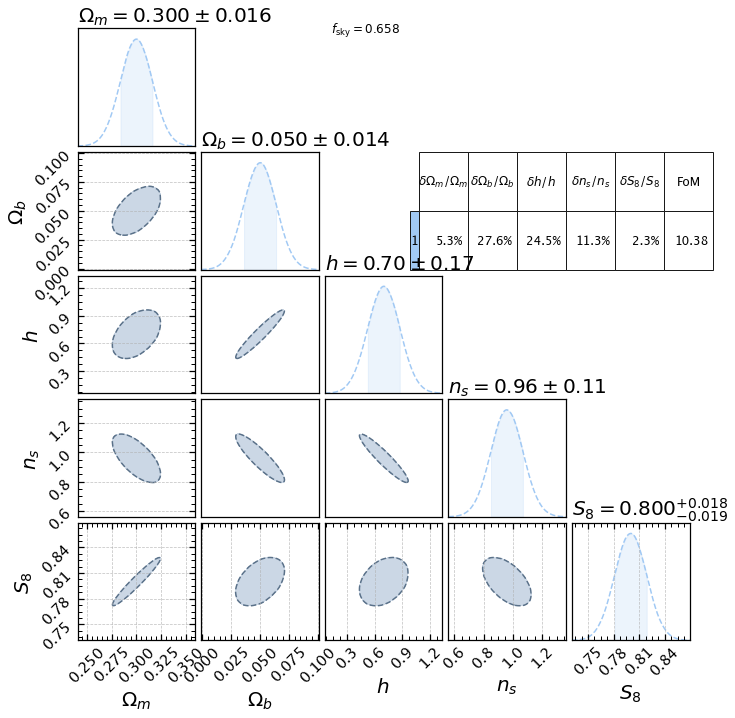

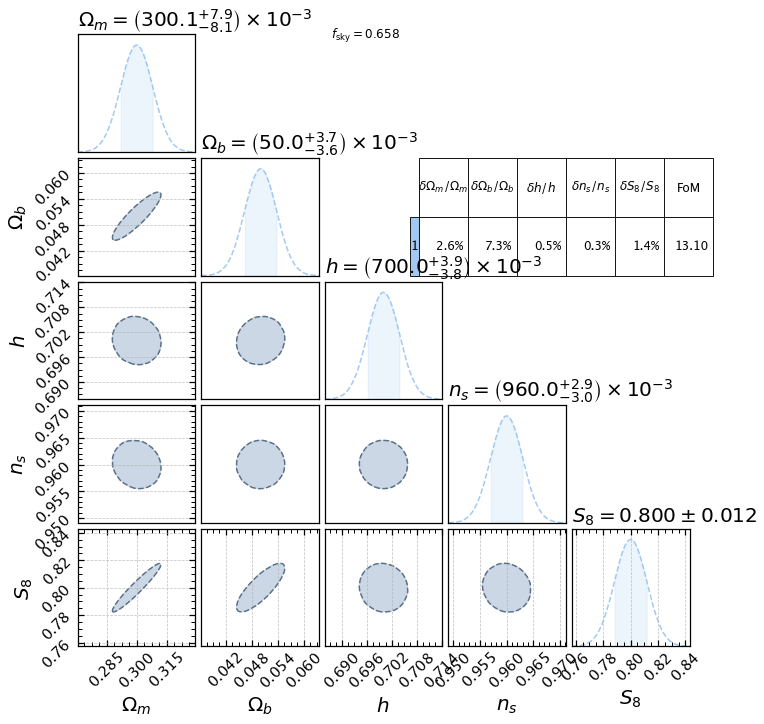

In [13]:
def load_fisher_sigma0_f_fail_s8(sigma_0, f_fail,):
    setname_clu = f'Clusters_{sigma_0}_{f_fail}'
    fname_clu = savepath + f'{setname_clu}.npz'
    setname_agn = f'AGN_{sigma_0}_{f_fail}'
    fname_agn = savepath + f'{setname_agn}.npz'
    Fs = []
    for fname, setname in zip([fname_clu, fname_agn], [setname_clu, setname_agn]):
        try:
            arr = np.load(fname, allow_pickle=True)
            pars = arr['pars']
            par_names = arr['par_names']
            F = arr['F']
            J = arr['J']
            comp = setname.split('_')
            Fname = f'{comp[0]}({comp[1]},{comp[2]})'
            F = FisherMatrix(par=pars, par_names=par_names, F=F,
                             J=J, name=Fname, function=lambda x: x)
            F = F.transform_to_Om_S8()
            Fs.append(F)
        except FileNotFoundError:
            Fs.append(None)
    return Fs

Fs_S8 = []
idx = 0
#print('ID ||| sigma0 | f_fail')
for sigma_0 in sigmas_clu:
    for f_fail in f_fails_clu:
        Fs_tmp = load_fisher_sigma0_f_fail_s8(sigma_0, f_fail)
        Fs_S8.append([Fs_tmp[0], Fs_tmp[1]])
        #print(f'  {idx} ||| {sigma_0} | {f_fail}')
        idx += 1


Fa=Fs_S8[optimistic_clu_id][0]
Fb=Fs_S8[optimistic_agn_id][1]
Fc = Fa+Fb

_, table1 = compare_fisher_matrices([Fc], title = '', fsky = 0.658, factor = 1,
**corner_plot_args);


Fa=Fs_S8[optimistic_clu_id][0].add_prior_by_idx(3, planck_ns_prior).add_prior_by_idx(2, planck_h_prior)
Fb=Fs_S8[optimistic_agn_id][1].add_prior_by_idx(3, planck_ns_prior).add_prior_by_idx(2, planck_h_prior)
Fc = Fa+Fb


_, table1 = compare_fisher_matrices([Fc], title = '', fsky = 0.658, factor = 1,
**corner_plot_args);
